# Info 6010 Ex 2
### 1A due Thu 20 Feb 2019, problems 1-3 due Thu 27 Feb 2019

Rather than working from this notebook, it's best if you start a new notebook.<br>
The first cell should be a markdown cell containing your name and netid (use the menu button 2nd from right above to change from code to markdown).<br>
Then you should transfer only the cells you need into the new notebook, so they're not lost in the explanatory text below.

Upload to: https://pgcourse.infosci.cornell.edu/cgi-bin/probset.py

In [1]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

## 1) logistic regression, Challenger data I

In the context of logistic regression, the 
[Challenger](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)
O-ring data failure data (from 1986) was discussed at the end of
[lec4.pdf](http://www.cs.cornell.edu/~ginsparg/6010/spr20/lec4.pdf):

Failures at temperatures: [70, 57, 63, 70, 53, 75, 58]

Successes at temperatures: [66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76]

Apparently they were aware of failures and successes at various temperatures, but were not considering the temperature dependence of these numbers when the decision to launch was made on 28 Jan 1986 at a temperature of $31^\circ$ F.

Looking at the graph of this data (below), suggests modeling the data with a logistic function:
Assuming the probability of success at temperature $t$ is given by $p(t\,|\,a,t_0) = 1/(1+\exp(-a(t-t_0))$, the probem below will be to find the maximum likelihood fit for the values of $a$ and $t_0$ (and plot it), and for those values to find the probability of failure at the launch temperature.

In [2]:
# success and failure temps
S = np.array([66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76])
F = np.array([70, 57, 63, 70, 53, 75, 58])

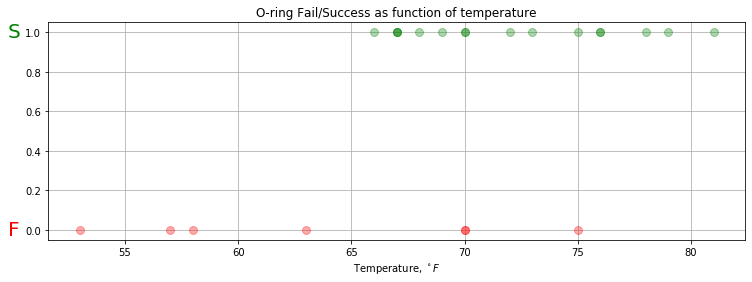

In [3]:
#first plot the data
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0,1.01,.2))
plt.plot(S, np.ones(len(S)), 'go',
         F, np.zeros(len(F)), 'ro', alpha=.33, markersize=8)
plt.xlabel("Temperature, ${}^\circ F$")
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')
plt.ylim(-.05,1.05)
plt.grid('on')
plt.title('O-ring Fail/Success as function of temperature');

Note that the transparency alpha=.5 makes visible when points are on top of each other (e.g., there are three success data points for t=67, and two failures and two successes for t=70).

Now define and plot the logistic function:

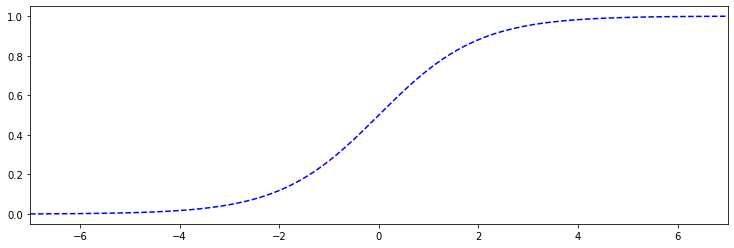

In [4]:
def p(t, a=1., t0=0.): return 1./(1.+np.exp(-a*(t-t0)))

plt.figure(figsize=(12.5, 4))
plt.xlim(-7,7)
xr=np.arange(-7.,7.1,.1)
plt.plot(xr,p(xr),'b--');

The object of this problem is to find parameters a and t0 for the logistic `p(t,a,t0)` that give the highest overall probability of the data, as explained in lec 4, and recapitulated below.

For each value of `t0` and `a`, there's a sigmoid function `p(t,a,t0)`. Mathematically that's $p(t\ |\ a, t_0)$, 
the probability that the O-ring is OK at temperature `t`, given some value of `t0` and `a`.
The probability of a data point is therefore `p(t,a,t0)` if the datapoint is a success (S), and `1 - p(t, a, t0)` if the datapoint is a failure (F).

To calculate the overall probability of the data (for some fixed `a,t0`), take a product of the above probabilities over the 23 data points (7 failures, 16 successes), i.e., 
`(1-p(53, a, t0)) * (1- p(57, a, t0)) * ... * p(79, a, t0) * p(78, a, t0)`
(and if a datapoint occurs more than once, it is included multiple times in the product, according to how it occurred each time).
That's the objective function inside the loop for which you're trying to to find the optimal values of `t0` and `a`.
Those values of `t0` and `a` maximize the probability of the data (given the assumption that the probability of failure is given by a sigmoid function in the first place).
Then for those maximum probable values, you will calculate the probability of failure for `t=31`.

[It's usually preferable to calculate the log of something small like a product of probabilities to avoid underflow (though python seems to do ok regardless). Recall from 
[lec4.pdf](http://www.cs.cornell.edu/~ginsparg/6010/spr20/lec4.pdf) that the `log` function can be interpreted as a magical function that converts products to sums, since the product just means adding the exponents of a given base.
Thus the log of the above expression is just the sum of the logs of the terms in the product, so the result would be `np.log(1-p(F,a,t0)).sum() + np.log(p(S,a,t0)).sum()`, 
where `F` is the array of values of t with failed o-ring (0), and S the array of values of t with success (1).<br>
Note that `p()` of an array will give a list of probabilities for each value in the array, then `np.log()` will similarly map onto each term on the list, then those values are summed by `.sum()`.]

Looking at the data plot (cell [3]), we see that `t0` (where the probability is .5) will be between 50 and 85, and `a` between 0 and 1 (so that the transition region will be spread wider than the graph in cell [4]).

There are more efficient ways of finding optimal values of parameters
(see, e.g., problem 2 below), but since there are only two parameters in this case it is possible to perform a brute-force search over the 2-dimensional grid of  values of `a in np.arange(.01,1.,.01)` and `t0 in np.arange(50,85.001,.5)`. That would be 99 values of `a` from .01 to .99, and 71 values of `t0` from 50 to 85.

**A.**

&nbsp; **i)** Find the optimal values of `a` and `t0`, maximizing the probability of the data

&nbsp; **ii)** plot the resulting logistic function on the same graph as the data (cell [3]).

&nbsp; **iii)** What is the probability of failure at `t=31` for these values of `a` and `t0`?

**B.** Draw a contour plot (to be covered in lec5) of the overall probability of the data for all values of `t0,a` in the range considered, to see how sharply the probably peaks at the maximum.  It might look something like the below (where the data plotted is entirely synthetic, so the position of the maximum will be different, as will be the shape of the contours around the maximum):

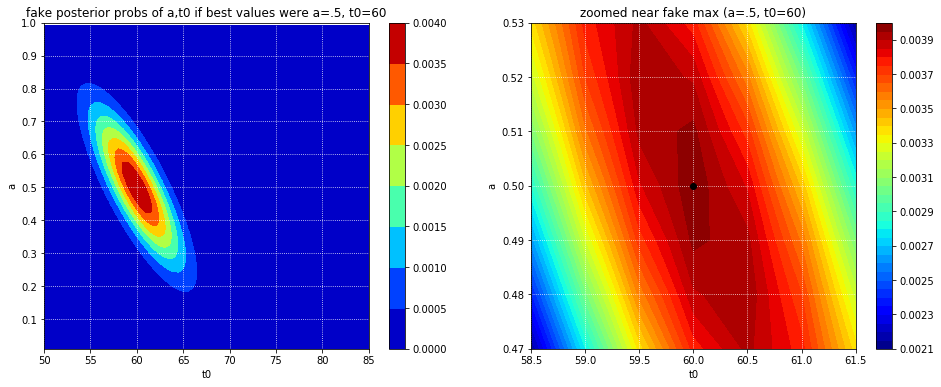

In [5]:
from scipy.stats import norm
t0r = np.arange(50,85.001,.5)
ar = np.arange(.01,1.,.01)
fakeprobs = np.array([[.01*norm.pdf(np.sqrt(.3*t**2 + 125*a**2 + 10*t*a)) #fake function
                        for t in t0r-60] for a in ar-.5])         #peaked at t0=60, a=.5

#look directly at the overall probability of the data for all values of t0, a
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.contourf(t0r, ar, fakeprobs, cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('fake posterior probs of a,t0 if best values were a=.5, t0=60')
plt.xlabel('t0'), plt.ylabel('a')
plt.yticks(np.arange(.1,1.1,.1));
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(t0r[17:24], ar[46:53], fakeprobs[46:53,17:24], levels=40, cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('zoomed near fake max (a=.5, t0=60)')
plt.plot(60,.5,'ok')
plt.xlabel('t0'), plt.ylabel('a')
plt.colorbar();

## 2) logistic regression, Challenger data II

**A.**
Redo the fit of the logistic parameters from problem 1) above 
using [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
(see also [plot_logistic](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html)).

The only minor subtlety is that for the xdata the scikit learn functions expect multi-dimensional data, so one-dimensional temperature data `[70, 57, 63, 70, 53, ...]` would instead have to be in the form `[[70], [57], [63], [70], [53], ...]`, which can be created from the lists above via `X = np.array(xdata)[:, None]`, i.e., adding an empty second dimension to each data point (or via `X=[[x] for x in xdata]`. The attributes `.coef_` and `.intercept_` of the fitted logistic classifier give respectively `a` and `-a*t0`, since they appear as `(coef *t + intercept) = a*(t - t0)` in the argument of the exponential.

You should find slightly different values for `a` and `t0` than found using the coarse grid -- check that they give a slightly better fit in the sense that they give a slightly higher probability of the data.

**B.**
Redraw the right hand contour plot in cell [5], but with a finer grid to show the position of the best value found by the sklearn algorithm.  Also plot a point showing as above  the location of the former best maximum found in problem 1).

## 3) [to be added within a couple of days]